In [1]:
# # This Python 3 environment comes with many helpful analytics libraries installed
# # It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# # For example, here's several helpful packages to load

# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# # Input data files are available in the read-only "../input/" directory
# # For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# # You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# # You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [83]:
import matplotlib as plt
%matplotlib inline
import seaborn as sns

In [85]:
df = pd.read_csv('/data/zomato.csv')
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


This is Zomato Dataset.

In [86]:
df.dtypes

,0
url,object
address,object
name,object
online_order,object
book_table,object
rate,object
votes,int64
phone,object
location,object
rest_type,object


In [87]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [88]:
df.rename(columns={'approx_cost(for two people)': 'Cost for 2 people', 'listed_in(type)': 'Type', 'listed_in(city)': 'City'}, inplace=True)

In [89]:
df.shape

(51717, 17)

In [90]:
df.drop_duplicates(inplace=True)


In [91]:
df.shape

(51717, 17)

There is no duplication in the data.


In [92]:
df.isna().sum()

,0
url,0
address,0
name,0
online_order,0
book_table,0
rate,7775
votes,0
phone,1208
location,21
rest_type,227


In [93]:
df=df.dropna()

This drop all NaN Values


In [94]:
df.isna().sum()

,0
url,0
address,0
name,0
online_order,0
book_table,0
rate,0
votes,0
phone,0
location,0
rest_type,0


<Axes: xlabel='book_table', ylabel='count'>

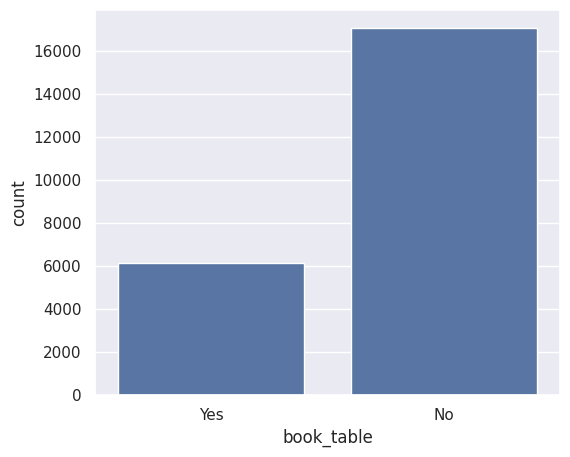

In [95]:
sns.countplot(x='book_table',data=df)

here we get table book values arount 6000 and not book table values around 17000


In [96]:
# df['book_table']= df['book_table'].map({ 'Yes':1,'No':0})


In [97]:
df['book_table']

,book_table
0,Yes
1,No
2,No
3,No
4,No
...,...
51705,Yes
51707,No
51708,No
51711,No


In [98]:
df['rate'] = df['rate'].replace({'/5': '', 'NEW': '0'}, regex=True).astype(float)
df['rate'].head()

,rate
0,4.1
1,4.1
2,3.8
3,3.7
4,3.8


<Axes: xlabel='book_table', ylabel='rate'>

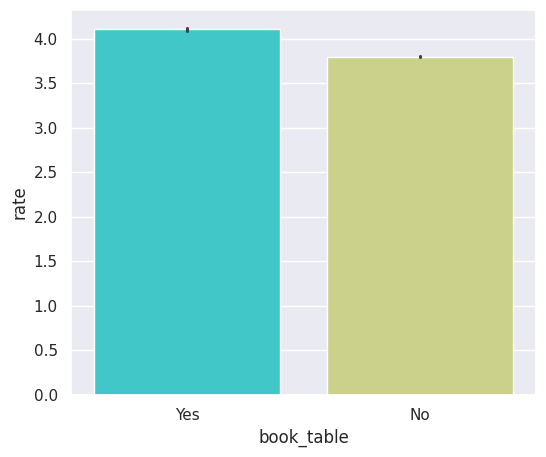

In [99]:
sns.barplot(x='book_table',y='rate',hue='book_table' , data=df , palette='rainbow')

It is Table book rating vs Non Book table Rating

which shows us that avg table book rating are more than  other

BEST LOCATION


In [100]:
Rating=pd.DataFrame(df.groupby('location')['rate'].mean())
Rating.head()

,rate
location,
BTM,3.731525
Banashankari,3.813437
Banaswadi,3.637245
Bannerghatta Road,3.682258
Basavanagudi,3.836713


In [101]:
Rating=Rating.sort_values(by='rate',ascending=False).head()

In [102]:
Rating

,rate
location,
Lavelle Road,4.193034
Sankey Road,4.105882
Koramangala 3rd Block,4.100617
Cunningham Road,4.100300
St. Marks Road,4.099013


<Axes: xlabel='location'>

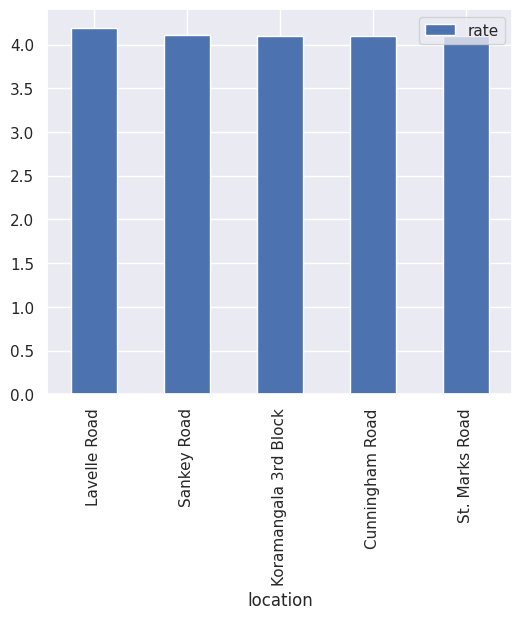

In [103]:
Rating.plot(kind='bar')

-This are the best location according to the rating.


/tmp/ipython-input-104-779279184.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='rate',data=Rating,palette='pastel')


<Axes: xlabel='rate', ylabel='count'>

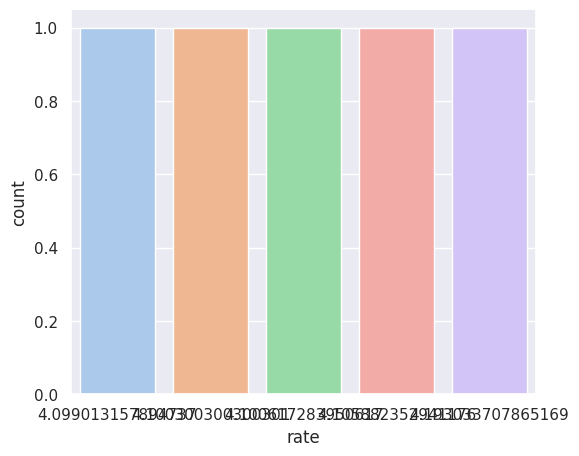

In [104]:
sns.countplot(x='rate',data=Rating,palette='pastel')


In [105]:
df['location'].unique()

array(['Banashankari', 'Basavanagudi', 'Jayanagar', 'Kumaraswamy Layout',
       'Rajarajeshwari Nagar', 'Mysore Road', 'Uttarahalli',
       'South Bangalore', 'Vijay Nagar', 'Bannerghatta Road', 'JP Nagar',
       'BTM', 'Wilson Garden', 'Koramangala 5th Block', 'Shanti Nagar',
       'Richmond Road', 'City Market', 'Bellandur', 'Sarjapur Road',
       'Marathahalli', 'HSR', 'Old Airport Road', 'Indiranagar',
       'Koramangala 1st Block', 'East Bangalore', 'MG Road',
       'Brigade Road', 'Lavelle Road', 'Church Street', 'Ulsoor',
       'Residency Road', 'Shivajinagar', 'Infantry Road',
       'St. Marks Road', 'Cunningham Road', 'Race Course Road', 'Domlur',
       'Koramangala 8th Block', 'Frazer Town', 'Ejipura', 'Vasanth Nagar',
       'Jeevan Bhima Nagar', 'Old Madras Road', 'Commercial Street',
       'Koramangala 6th Block', 'Majestic', 'Langford Town',
       'Koramangala 7th Block', 'Brookefield', 'Whitefield',
       'ITPL Main Road, Whitefield', 'Varthur Main Road, Whi

In [106]:
r=df.groupby('location')['rate'].mean().nlargest(10)

r

,rate
location,
Lavelle Road,4.193034
Sankey Road,4.105882
Koramangala 3rd Block,4.100617
Cunningham Road,4.100300
St. Marks Road,4.099013
Koramangala 5th Block,4.098149
Koramangala 2nd Block,4.073333
Sadashiv Nagar,4.055263
Residency Road,4.051584


/tmp/ipython-input-107-3709309221.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=r.index,y=r,palette='rainbow')


<Axes: xlabel='location', ylabel='rate'>

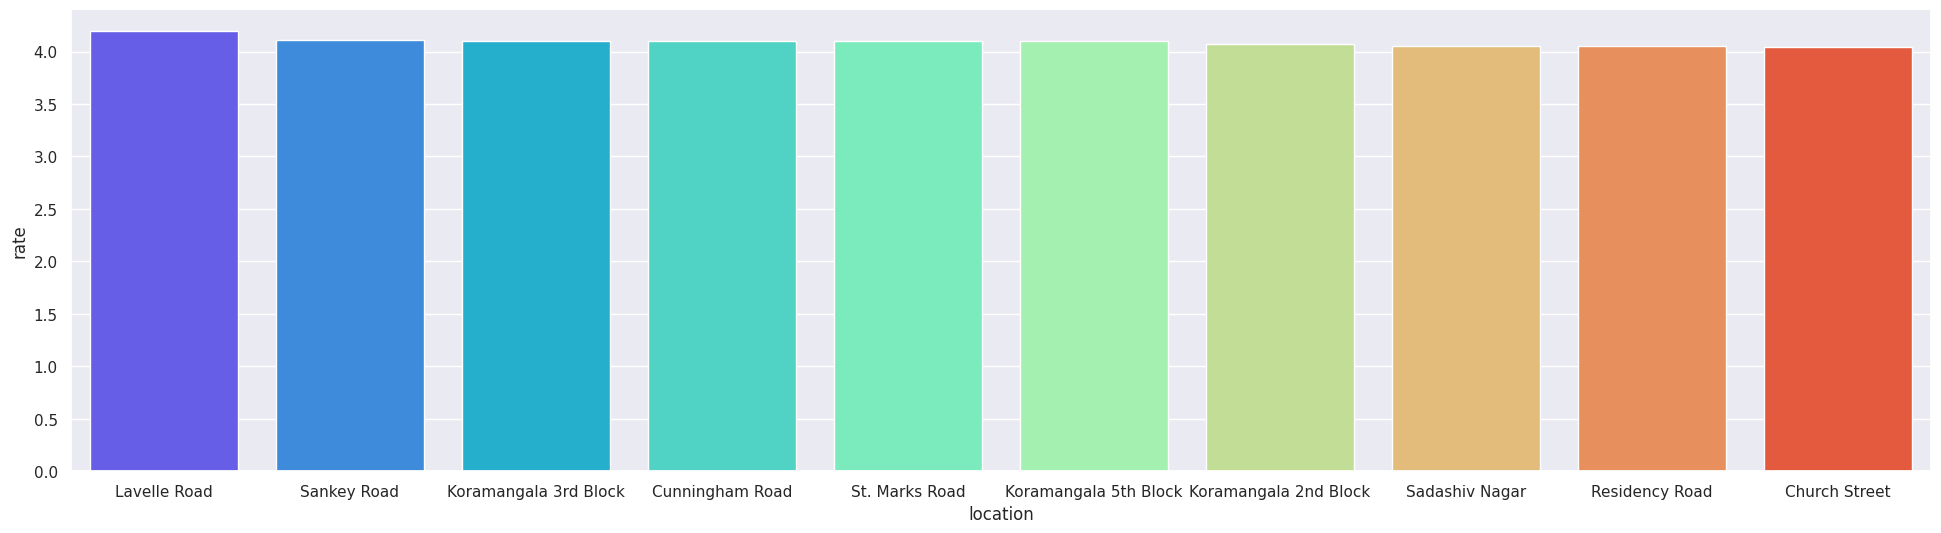

In [107]:
sns.set(rc={"figure.figsize":(24, 6)})
sns.barplot(x=r.index,y=r,palette='rainbow')


<Axes: xlabel='rest_type'>

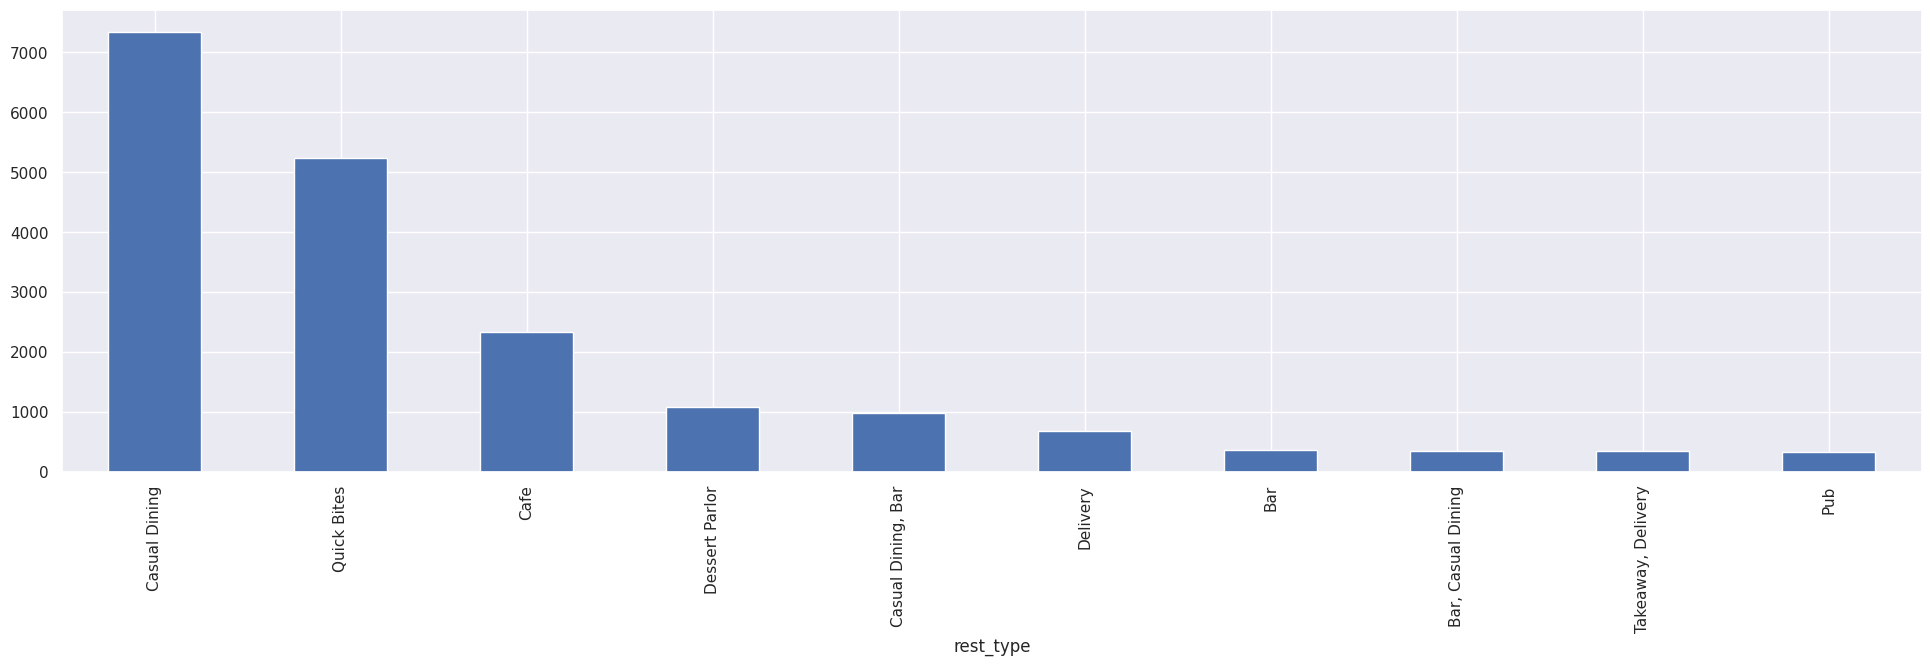

In [108]:
rt=df['rest_type'].value_counts().sort_values(ascending =False)
rt.head(10).plot(kind = 'bar')



<Axes: ylabel='count'>

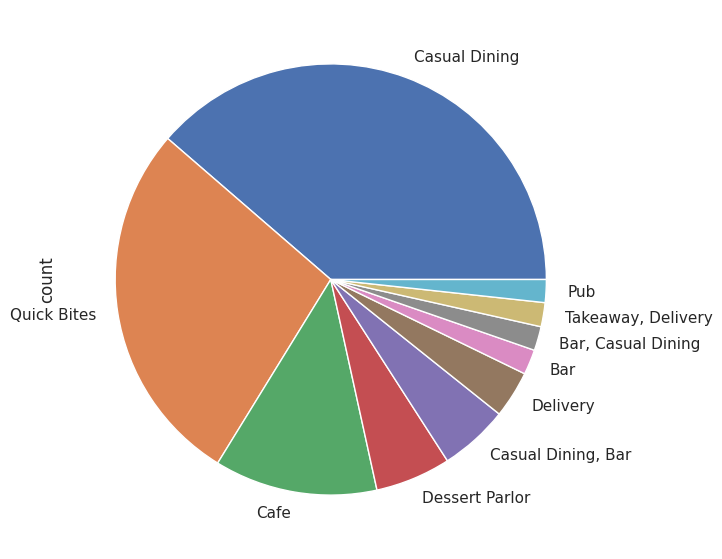

In [109]:
sns.set(rc={"figure.figsize":(7,7)})
rt.head(10).plot(kind = 'pie')

**here we can see type of cafe dining is used most , after that there is quickbites are used most and next the cafe and so on.**


In [110]:
g=df.groupby('rest_type')['rate'].mean().reset_index()

g

,rest_type,rate
0,Bakery,3.930573
1,"Bakery, Cafe",4.031884
2,"Bakery, Dessert Parlor",4.001613
3,"Bakery, Quick Bites",3.370833
4,Bar,3.976190
...,...,...
68,"Quick Bites, Sweet Shop",3.834146
69,Sweet Shop,3.880392
70,"Sweet Shop, Quick Bites",3.814773
71,Takeaway,3.561538


<Axes: ylabel='Density'>

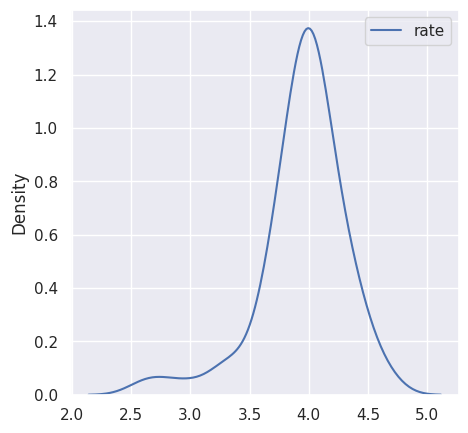

In [111]:
sns.set(rc={"figure.figsize":(5,5)})
sns.kdeplot(data =g)

<Axes: xlabel='Type'>

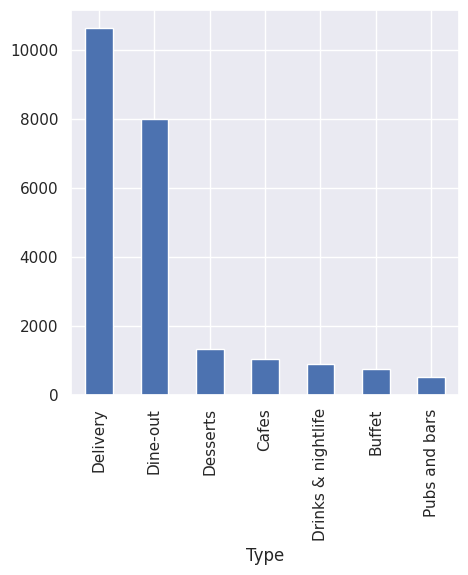

In [112]:
st=df['Type'].value_counts().sort_values(ascending =False)
st.head(10).plot(kind = 'bar')

Here We can see that the delivery services are use most then the dine-out and next the desserts and so on.

In [113]:
st

,count
Type,
Delivery,10625
Dine-out,8009
Desserts,1333
Cafes,1047
Drinks & nightlife,890
Buffet,762
Pubs and bars,527


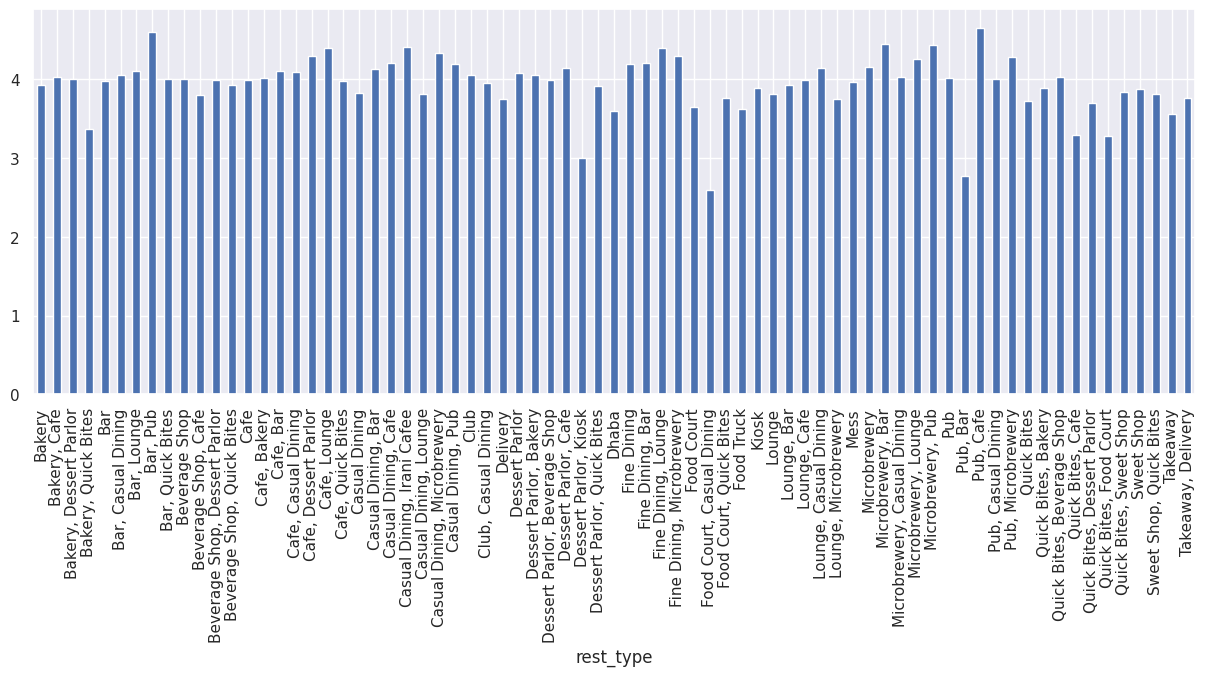

In [114]:
sns.set(rc={'figure.figsize':(15, 5)})
tr = df.groupby('rest_type')['rate'].mean().plot(kind='bar')

This are the Relation Between Type of restaurant and rating  

In [115]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,Cost for 2 people,reviews_list,menu_item,Type,City
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [116]:
df['Cost for 2 people']=df['Cost for 2 people'].str.replace(',','').astype(int)


In [117]:
c=df.groupby('name')['Cost for 2 people'].mean().sort_values(ascending=False).head(10).reset_index()
c

,name,Cost for 2 people
0,Le Cirque Signature - The Leela Palace,6000.0
1,Royal Afghan - ITC Windsor,5000.0
2,Malties - Radisson Blu,4500.0
3,La Brasserie - Le Meridien,4100.0
4,Edo Restaurant & Bar - ITC Gardenia,4000.0
5,Dum Pukht Jolly Nabobs - ITC Windsor,4000.0
6,Dakshin - ITC Windsor,4000.0
7,Alba - JW Marriott Bengaluru,4000.0
8,Masala Klub - The Taj West End,4000.0
9,Riwaz - The Ritz-Carlton,4000.0


/tmp/ipython-input-118-837072180.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=c,x='Cost for 2 people',y='name',palette='rainbow')


<Axes: xlabel='Cost for 2 people', ylabel='name'>

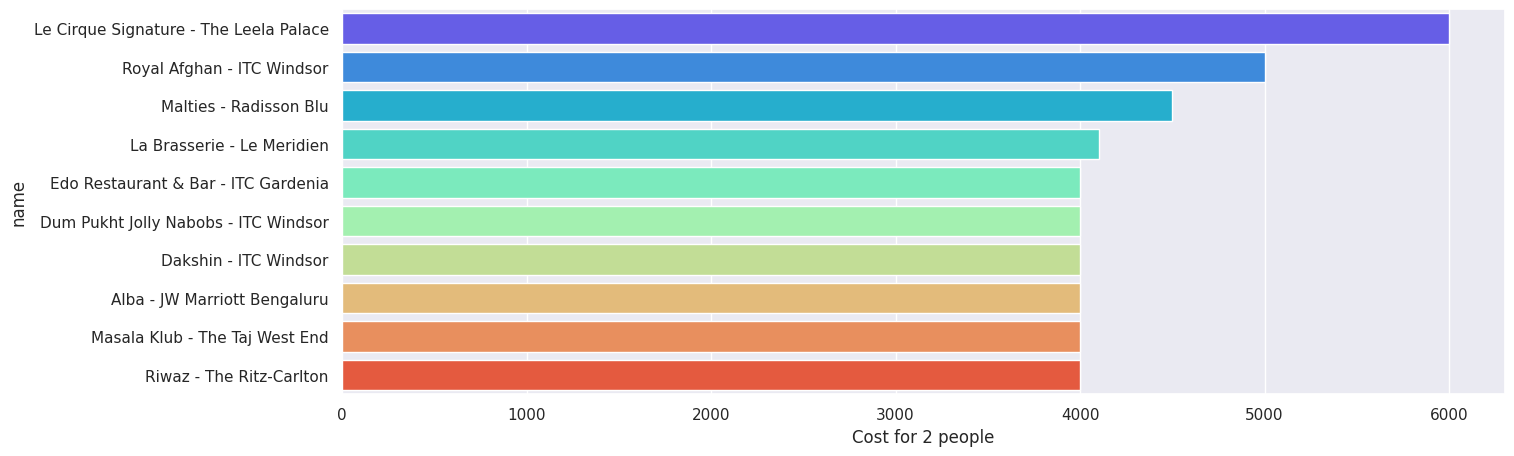

In [118]:
sns.barplot(data=c,x='Cost for 2 people',y='name',palette='rainbow')


Here we can see there are various prices for restaurants for two peoples


In [119]:
l=df['location'].value_counts().head(10).reset_index()
l

,location,count
0,Koramangala 5th Block,1783
1,BTM,1456
2,Indiranagar,1350
3,HSR,1162
4,Jayanagar,1037
5,JP Nagar,1016
6,Whitefield,824
7,Koramangala 7th Block,725
8,Koramangala 6th Block,720
9,Marathahalli,683


<Axes: xlabel='location'>

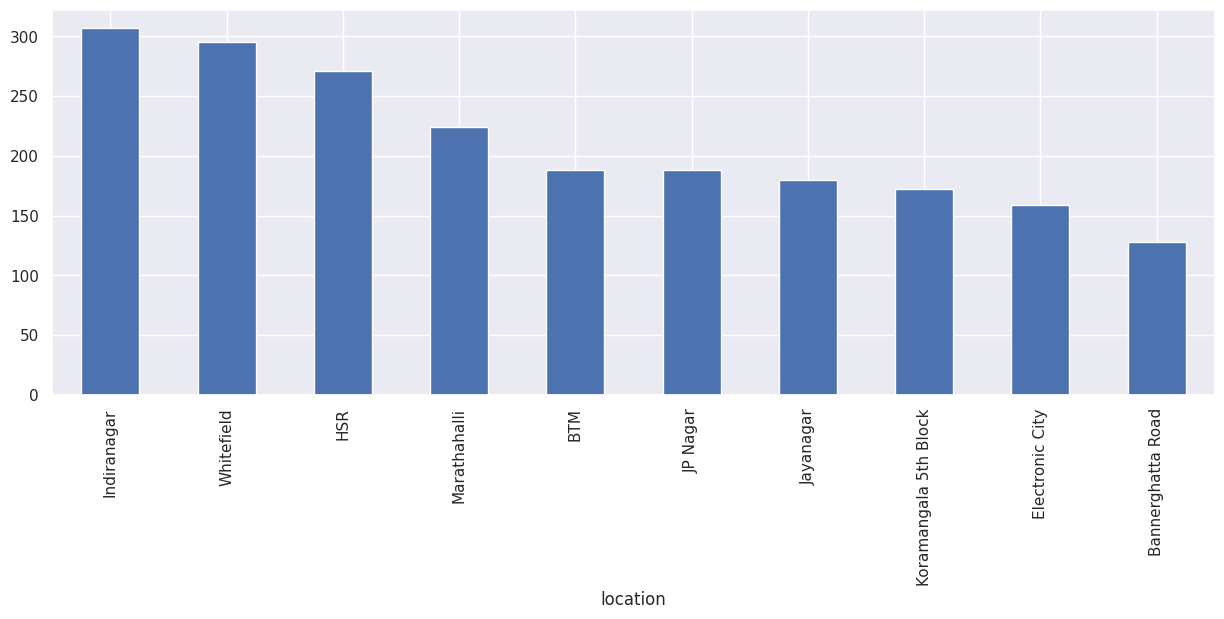

In [120]:
df.groupby('location')['name'].nunique().nlargest(10).plot(kind='bar')

here we can see that different location has different number of restaurants the highest restaurants are in  indiranagar then then white field next the HSR and so on.


# Most famous restaurant chains in Bengaluru


<Axes: xlabel='name'>

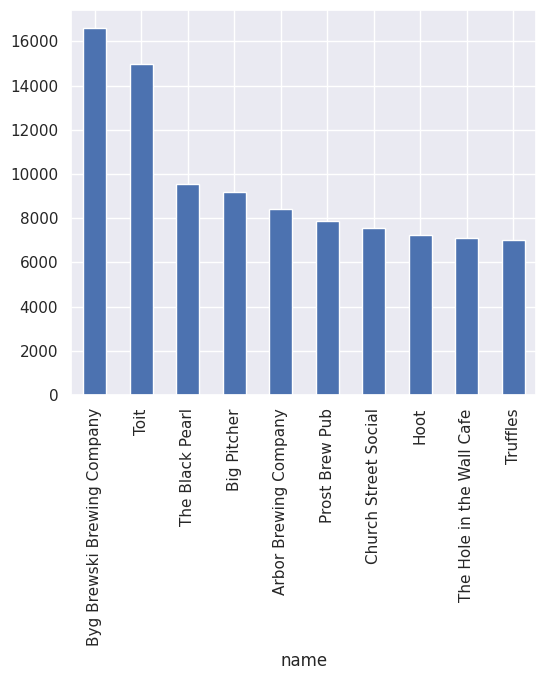

In [121]:
sns.set(rc={'figure.figsize':(6, 5)})
fam=df.groupby('name')['votes'].mean().nlargest(10)
fam.plot(kind='bar')

These are the most famous restaurants according to the no. of voting.

* Here we can see that **Byg Brewski Brewing Company** has most voting i.e around 16500 votes
* then **Toit** has next to it around 15000 votes after that
* **The Black Pearl** has 9500 votes and so on.


In [122]:
fam

,votes
name,
Byg Brewski Brewing Company,16588.500000
Toit,14956.000000
The Black Pearl,9562.333333
Big Pitcher,9164.500000
Arbor Brewing Company,8396.545455
Prost Brew Pub,7860.900000
Church Street Social,7561.727273
Hoot,7257.000000
The Hole in the Wall Cafe,7124.875000


In [123]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,Cost for 2 people,reviews_list,menu_item,Type,City
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


# Regression

In [124]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

model_df = df.copy()

model_df = model_df[['rate', 'votes', 'online_order', 'book_table', 'Cost for 2 people']].dropna()

model_df['online_order'] = model_df['online_order'].map({'Yes': 1, 'No': 0})
model_df['book_table'] = model_df['book_table'].map({'Yes': 1, 'No': 0})

X = model_df.drop('rate', axis=1)
y = model_df['rate']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [125]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

# Evaluation
lr_rmse = np.sqrt(mean_squared_error(y_test, lr_pred))
lr_r2 = r2_score(y_test, lr_pred)

print("🔹 Linear Regression Results")
print("RMSE:", lr_rmse)
print("R² Score:", lr_r2)


🔹 Linear Regression Results
RMSE: 0.4758561146055141
R² Score: 0.15555407913712804


In [126]:
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)

# Evaluation
dt_rmse = np.sqrt(mean_squared_error(y_test, dt_pred))
dt_r2 = r2_score(y_test, dt_pred)

print("🌳 Decision Tree Regression Results")
print("RMSE:", dt_rmse)
print("R² Score:", dt_r2)


🌳 Decision Tree Regression Results
RMSE: 0.24555399126455046
R² Score: 0.7751387974693129


In [127]:
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

# Evaluation
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_pred))
rf_r2 = r2_score(y_test, rf_pred)

print("🌲 Random Forest Regression Results")
print("RMSE:", rf_rmse)
print("R² Score:", rf_r2)


🌲 Random Forest Regression Results
RMSE: 0.23893964242677299
R² Score: 0.7870895624031086


Random Forest clearly outperforms the others in predicting restaurant ratings.

Linear Regression fails to model the complexity of the data.

Decision Tree works well but not as consistently as Random Forest.